##### PAIR PROGRAMMING - REGRESIÓN LOGÍSTICA - DECISION TREE

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings

In [2]:
df = pd.read_pickle("../datos/df_estan_cod.pkl")
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,...,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,0,1,1.041667,0,2,-1.400844,0,0,2,...,2,3,3,4,0,3,1,4,4,0.000000
1,0,1,1,0.291667,0,1,0.454852,0,0,4,...,3,3,3,2,1,2,3,4,4,25.833333
2,0,0,1,-1.041667,0,2,0.179747,0,0,4,...,0,3,3,4,2,2,2,2,4,0.000000
3,0,0,1,0.833333,0,2,-1.098734,0,0,4,...,2,3,3,3,0,0,2,3,2,0.000000
4,0,0,1,1.250000,0,2,-1.325738,0,0,4,...,3,2,3,3,0,0,2,3,1,0.000000


In [3]:
df.index

RangeIndex(start=0, stop=129880, step=1)

- Ajustad un modelo de Decision Tree a nuestros datos.


In [4]:
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [5]:
X1.head(2)

,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,1,1.041667,0,2,-1.400844,0,0,2,2,2,3,3,4,0,3,1,4,4,0.000000
1,1,1,0.291667,0,1,0.454852,0,0,4,0,3,3,3,2,1,2,3,4,4,25.833333


In [6]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: satisfaction, dtype: int64

In [7]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [8]:
# creamos el objeto del modelo
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

In [9]:
# max features para obtener la profudidad máxima. En nuestro caso parece que está cercana al 5

max_features = np.sqrt(len(x_train1.columns))
max_features

4.47213595499958

In [10]:
# max depth

print(arbol.tree_.max_depth)

34


In [11]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train

y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [12]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [13]:
# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

dt_resultados = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree I")
dt_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.931976,0.925236,0.923255,0.924244,0.86252,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.00000,train,Decission Tree I


COMENTARIO:

- Vemos un claro overfitting porque los valores del train son mucho mejores que los del test. 
- El modelo se ha aprendido los datos de memoria; por tanto, habrá que reducir la profundidad del modelo.

In [14]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [7,15, 34], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]}

In [15]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [16]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [7, 15, 34], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [17]:
# usamos el método best_estimator_ para obtener el mejor ajuste posible
 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=15, max_features=4, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [18]:
param1 = {"max_depth": [7,10,15], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [5, 10, 15],
        "min_samples_leaf": [5, 10, 15]}

In [19]:
gs1 = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [20]:
gs1.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [7, 15, 34], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [21]:
mejor_modelo2 = gs1.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=15, max_features=4, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [22]:
y_pred_test2 = mejor_modelo2.predict(x_test1)
y_pred_train2 = mejor_modelo2.predict(x_train1)

- Calculad las métricas de nuestro nuevo modelo.


In [23]:
#sacamos otra vez los resultados de este segundo entrenamiento con ajuste de profundidad

df_resultados1 = metricas(y_test1, y_pred_test2, y_train1, y_pred_train2, "Decission Tree II")
df_resultados1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.928665,0.917815,0.924026,0.92091,0.855946,test,Decission Tree II
1,0.938809,0.927828,0.938028,0.93290,0.876664,train,Decission Tree II


COMENTARIO:
- Hemos conseguido reducir el overfitting del train, cuyos valores eran todos 1, y ahora los valores parecer estar algo más balanceados.


##################################################################################################

- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [24]:
df_logis = pd.read_pickle('../datos/resultados_log.pkl')
df_logis.head()

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.879427,0.871209,0.858672,0.864895,0.756042,test,Regresión Logística
1,0.878157,0.868882,0.861284,0.865067,0.754002,train,Regresión Logística


In [25]:
# concatenamos los 2 dataframes para poder comparar bien las métricas y analizarlas

df_metricas = pd.concat([dt_resultados, df_resultados1, df_logis], axis = 0)

In [26]:
df_metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.931976,0.925236,0.923255,0.924244,0.862520,test,Decission Tree I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
0,0.928665,0.917815,0.924026,0.920910,0.855946,test,Decission Tree II
1,0.938809,0.927828,0.938028,0.932900,0.876664,train,Decission Tree II
0,0.879427,0.871209,0.858672,0.864895,0.756042,test,Regresión Logística
1,0.878157,0.868882,0.861284,0.865067,0.754002,train,Regresión Logística


COMENTARIO:

- El modelo de Decission Tree 1: observamos que en el train, el modelo se ha aprendido los datos de memoria. Asimismo, aunque en el test observamos un kappa alto (0.86), vemos que hay una gran diferenci entre ambos kappa del train y test. Por tanto, no vamos a continuar trabajando con este modelo.
  
- El modelo Decission Tree II: observamos que hemos mejorado un poco las métricas respecto del anterior. Esto se debe a que hemos adaptado los hiperparámetros de profundidad. Por tanto, aunque se observa que el kappa ha bajado un poco (0.86 vs 0.85 ahora) en el test, se puede ver que en el train se han mejorado algo las métricas y ya no son tan cercanas a 1. No obstante, el modelo continua teniendo underfitting.
  
- El modelo de Regresión Logística: los valores del test parecen ser mejores que los del train, lo que podría hacernos pensar que hay un poco de underfitting, pero la diferencia no es tan grande como para llegar a asegurarlo (tampoco porque apenas hay diferencias sustanciales entre ambos kappa). No obstante, vemos que tenemos un kappa alto en ambos casos (train y test), lo que quiere decir que el modelo no acierta por azar y eso es bueno.

In [27]:
#vemos la importancia de las variables predictoras con el método feature_importantes_

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
6,seat_comfort,0.225979
11,online_support,0.189667
14,leg_room_service,0.096443
1,customer_type,0.096127
7,departure/arrival_time_convenient,0.063877
10,inflight_entertainment,0.051628
12,ease_of_online_booking,0.043967
3,type_of_travel,0.034057
0,gender,0.031725
4,class,0.030838


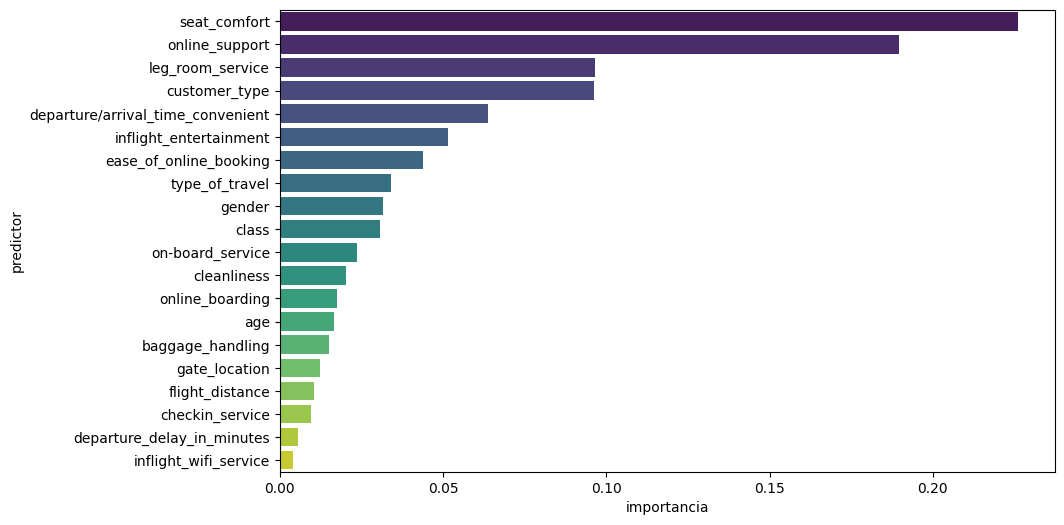

In [28]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [29]:
df_metricas.to_pickle('../datos/comparacion_resultados_metricas.pkl')